1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step


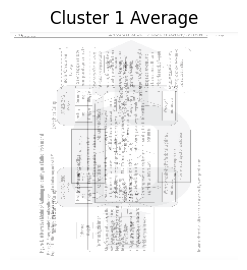

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from PIL import Image

# Load and preprocess images
def load_and_preprocess_images(image_paths, target_size=(224, 224)):
    images = [load_img(path, target_size=target_size) for path in image_paths]
    images_array = np.array([img_to_array(image) for image in images])
    images_array = preprocess_input(images_array)
    return images, images_array

# Feature extraction using VGG16
def extract_features(images_array):
    model = VGG16(weights='imagenet', include_top=False)
    features = model.predict(images_array)
    features_flattened = features.reshape(features.shape[0], -1)
    return features_flattened

# Dimensionality reduction using PCA
def reduce_dimensions(features_flattened, n_components=3):
    pca = PCA(n_components=n_components)
    reduced_features = pca.fit_transform(features_flattened)
    return pca, reduced_features

# Clustering
def cluster_features(reduced_features, n_clusters=1):
    kmeans = KMeans(n_clusters=n_clusters)
    labels = kmeans.fit_predict(reduced_features)
    return labels, kmeans.cluster_centers_

# Compute average images per cluster
def average_images_per_cluster(images, labels, n_clusters):
    average_images = []
    for i in range(n_clusters):
        cluster_indices = np.where(labels == i)[0]
        cluster_images = [images[idx] for idx in cluster_indices]
        cluster_array = np.array([img_to_array(img) for img in cluster_images])
        average_image = np.mean(cluster_array, axis=0)
        average_images.append(average_image)
    return average_images

# Load images
image_paths = ['../images/example_1.png', '../images/example_2.png', '../images/example_3.png']
images, images_array = load_and_preprocess_images(image_paths)

# Extract features and reduce dimensions
features_flattened = extract_features(images_array)
pca, reduced_features = reduce_dimensions(features_flattened)

# Cluster features
labels, cluster_centers = cluster_features(reduced_features)

# Create average images for each cluster
average_images = average_images_per_cluster(images, labels, n_clusters=1)

# Visualization of the average images
plt.figure(figsize=(10, 5))
for i, avg_img in enumerate(average_images):
    plt.subplot(1, 3, i + 1)
    plt.imshow(avg_img.astype(np.uint8))  # Convert float to uint8 for display
    plt.title(f'Cluster {i+1} Average')
    plt.axis('off')
plt.show()
